In [1]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.metrics as sm
import pandas as pd
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
data = pd.read_csv("dataset.csv", encoding= 'unicode_escape', nrows=50)

#Display the data
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
data = pd.DataFrame(data)

In [4]:
selected_columns = data[['text', 'label']]

In [5]:
selected_columns

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
5,I think he doesn't want to put in the effort f...,1
6,It was a big company so luckily I didn't have ...,0
7,It cleared up and I was okay but. On Monday ...,1
8,I actually give an assistant half my emergency...,1
9,I just feel like the street life has fucked my...,1


In [6]:
!pip install -U deep-translator
from deep_translator import GoogleTranslator  

def translate_text(text):
    text = GoogleTranslator(source='auto', target='si').translate(text)
    return text

sinhala_text = []
for row in selected_columns['text']:
  sin_text = translate_text(row)
  sinhala_text.append(sin_text)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
selected_columns['sinhala_text'] = sinhala_text
selected_columns.head()

,text,label,sinhala_text
0,"He said he had not felt that way before, sugge...",1,"ඔහු පැවසුවේ ඔහුට මීට පෙර එසේ දැනී නොතිබූ බවත්,..."
1,"Hey there r/assistance, Not sure if this is th...",0,"හේයි r/සහාය, මෙය පළ කිරීමට සුදුසු ස්ථානය මෙයදැ..."
2,My mom then hit me with the newspaper and it s...,1,"ඊට පස්සේ මගේ අම්මා මට පත්තරෙන් ගැහුවා, එයා මේක..."
3,"until i met my new boyfriend, he is amazing, h...",1,"මට මගේ අලුත් පෙම්වතා මුණගැසෙන තුරු, ඔහු පුදුම ..."
4,October is Domestic Violence Awareness Month a...,1,ඔක්තෝබර් යනු ගෘහස්ථ ප්‍රචණ්ඩත්වය පිළිබඳ දැනුවත...


In [8]:
import regex as re

def sinhala_to_singlish(char):
  mapping = {
    'ක්': 'k','ක': 'k','කා': 'ka',
    'කැ': 'kA','කෑ': 'kAa','කි': 'ki',
    'කී': 'kii','කු': 'ku',
    'කූ': 'kuu','කෙ': 'ke',
    'කේ': 'kei','කො': 'ko',
    'කෝ': 'koe','කෞ': 'kau',
    'ක්‍ර': 'kra','ක්‍රා': 'kraa',
    'ක්‍රැ': 'krA','ක්‍රෑ': 'krAa',
    'ක්‍රි': 'kri','ක්‍රී': 'krie',
    'කෘ': 'kru','කෲ': 'kruu',
    'ක්‍රෙ': 'kre','ක්‍රේ': 'krei',
    'ක්‍රො': 'kro','ක්‍රෝ': 'kroe',
    'ර්‍ක': 'rka','ක්‍ය': 'kYa',
    'කෛ': 'kaa','අ':'a','ආ': 'aa',
    'ඇ': 'A', 'ඈ': 'Aa',
    'ඉ': 'i','ඊ': 'ii',
    'එ': 'e','ඒ': 'ea',
    'ඔ': 'o','ඕ': 'oe',
    'උ': 'u','ඌ': 'uu',
    'ඛ': 'Ga', 'ඛ': 'kha',
    'ග': 'ga','ඝ': 'gha','හු':'hu','පැ':'pA',
    'ඝ': 'Ga','ච': 'cha',
    'ඡ': 'Cha','ජ': 'ja',
    'ඥ': 'GNa','ඤ': 'KNa',
    'ඣ': 'qa','ට': 'ta',
    'ඨ': 'Ta','ඩ': 'da',
    'ඪ': 'Da','ත': 'tha',
    'ථ': 'Tha','ද': 'dha',
    'ධ': 'Dha','න': 'na',
    'ණ': 'Na','ප': 'pa',
    'බ': 'ba','ම': 'ma',
    'ය': 'ya','ර': 'ra',
    'ල': 'la','ව': 'wa',
    'ස': 'sa','හ': 'ha',
    'ළ': 'La','භ': 'bha',
    'ඹ': 'Ba','ශ': 'sha',
    'ෂ': 'Sha','ෆ': 'fa',
    'ළු': 'Lu','ළූ': 'LuAa',
   # 'ං': 'x , \n','ඃ': 'X , \h',
   # 'ඞ': '\N','ඳ': 'nndha',
    'ඟ': 'nnga', 'ඬ': 'nnda'
  }

  return mapping.get(char, char)

letters = []
glish = []
singlish_text = []
for row in selected_columns['sinhala_text']:
  words = row.split(" ")
  full_text = ''
  for word in words:
    text = ''
    letter_list = re.findall(r'\X', word, re.UNICODE)
    for letter in letter_list:
      letters.append(letter)
      text = text + sinhala_to_singlish(letter)
    glish.append(text) 
    full_text = full_text + text + ' '
  singlish_text.append(full_text)


In [9]:
singlish_text

['ohu pAwaසුවේ ohuta මීta පෙra eසේ දැනී නොතිබූ bawaත්, mama විවේk gaන්නා ලෙsa යෝjaනා kLa bawaත්, oba මා වැනි haයිපොkoන්ඩ්\u200dරිyak naම් iදිරිyata ක්\u200dරියා krana ලෙsata යෝjaනා kLa bawaත් ohu pAwaසීya: samahara විta හාවා සිදුrakta uරා බීමේ baලාපොරොත්තුවෙන් "විනාshaයේ හැඟීම්" සොයා බැලීmata mama තීraNaya kraමි. හාස්\u200dyajanak kumaන්ත්\u200draNayak, මෝda "oba මාnaසිkdha" paරීkShaNayak හෝ nawa යුgaයේ b.s., mata mahamagaදී සිනාසීmata paවා හැki දෙyak. නැtha, මෙma විනාshaya පිළිbaඳ හැඟීma විවිDha සෞඛ්\u200dya රෝga පිළිbaඳ Anngaවීmak විya හැki bawa mama kiyaවා awasaන් kළෙමි; iන් ekkta mama නැඹුරු වෙමි.. iතින් maගේ "විනාshaya" matha maගේ aඳුrata.. mama දැන් maගේ hadhawatha ගැna knaස්saල්lata paත්wa සිටිමි. mata pAya 48 kiන් ශාරීරිkwa සිදු වෙnaවා. ',
 'හේයි r/saහාya, මෙya paLa kiරීmata සුදුසු ස්ථාnaya මෙyaදැයි විශ්වාsa නැtha.. naමුත් මෙන්na =) mama දැnata Sandia National Labs හි ශිෂ්\u200dya සීමාවාසිkයෙku wana athara බොහෝ ස්ථාnawala apaගේ aලෙවිkraNa ප්\u200drayaත්nayaන් වැඩිදියුණු kiරීmat

In [10]:
selected_columns['singlish_text'] = singlish_text
selected_columns.head()

,text,label,sinhala_text,singlish_text
0,"He said he had not felt that way before, sugge...",1,"ඔහු පැවසුවේ ඔහුට මීට පෙර එසේ දැනී නොතිබූ බවත්,...",ohu pAwaසුවේ ohuta මීta පෙra eසේ දැනී නොතිබූ b...
1,"Hey there r/assistance, Not sure if this is th...",0,"හේයි r/සහාය, මෙය පළ කිරීමට සුදුසු ස්ථානය මෙයදැ...","හේයි r/saහාya, මෙya paLa kiරීmata සුදුසු ස්ථාn..."
2,My mom then hit me with the newspaper and it s...,1,"ඊට පස්සේ මගේ අම්මා මට පත්තරෙන් ගැහුවා, එයා මේක...",iita paස්සේ maගේ aම්මා mata paත්thaරෙන් ගැhuවා...
3,"until i met my new boyfriend, he is amazing, h...",1,"මට මගේ අලුත් පෙම්වතා මුණගැසෙන තුරු, ඔහු පුදුම ...","mata maගේ aලුත් පෙම්waතා මුNaගැසෙna තුරු, ohu ..."
4,October is Domestic Violence Awareness Month a...,1,ඔක්තෝබර් යනු ගෘහස්ථ ප්‍රචණ්ඩත්වය පිළිබඳ දැනුවත...,okතෝbaර් yaනු ගෘhaස්Tha ප්‍rachaණ්daත්waya පිළ...


In [11]:
code_mixed_text = []
for index, row in selected_columns.iterrows():
  val = row['text'] + ":" + row['sinhala_text'] + ":" + row['singlish_text']
  code_mixed_text.append(val)

In [12]:
code_mixed_text

['He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.:ඔහු පැවසුවේ ඔහුට මීට පෙර එසේ දැනී නොතිබූ බවත්, මම විවේක ගන්නා ලෙස යෝජනා කළ බවත්, ඔබ මා වැනි හයිපොකොන්ඩ්\u200dරියක් නම් ඉදිරියට ක්\u200dරියා කරන ලෙසට යෝජනා කළ බවත් ඔහු පැවසීය: සමහර විට හාවා සිදුරකට උරා බීමේ බලාපොරොත්තුවෙන් "විනාශයේ හැඟීම්" සොයා බැලීමට මම තීරණය කරමි. හාස්\u200dයජනක කුමන්ත්\u200dරණයක්, මෝඩ "ඔබ මානසිකද" පරීක්ෂණයක් හෝ නව යුගයේ b.s., මට මහමගදී සිනාසීමට පවා හැකි දෙයක්. නැත, මෙම විනාශය පිළිබඳ හැඟීම විවිධ සෞඛ්\u2

In [13]:
selected_columns['code_mixed_text'] = code_mixed_text
selected_columns.head()

,text,label,sinhala_text,singlish_text,code_mixed_text
0,"He said he had not felt that way before, sugge...",1,"ඔහු පැවසුවේ ඔහුට මීට පෙර එසේ දැනී නොතිබූ බවත්,...",ohu pAwaසුවේ ohuta මීta පෙra eසේ දැනී නොතිබූ b...,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th...",0,"හේයි r/සහාය, මෙය පළ කිරීමට සුදුසු ස්ථානය මෙයදැ...","හේයි r/saහාya, මෙya paLa kiරීmata සුදුසු ස්ථාn...","Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...,1,"ඊට පස්සේ මගේ අම්මා මට පත්තරෙන් ගැහුවා, එයා මේක...",iita paස්සේ maගේ aම්මා mata paත්thaරෙන් ගැhuවා...,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h...",1,"මට මගේ අලුත් පෙම්වතා මුණගැසෙන තුරු, ඔහු පුදුම ...","mata maගේ aලුත් පෙම්waතා මුNaගැසෙna තුරු, ohu ...","until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...,1,ඔක්තෝබර් යනු ගෘහස්ථ ප්‍රචණ්ඩත්වය පිළිබඳ දැනුවත...,okතෝbaර් yaනු ගෘhaස්Tha ප්‍rachaණ්daත්waya පිළ...,October is Domestic Violence Awareness Month a...


In [15]:
selected_columns.to_csv("Created_Dataset.csv", index=False)

# `Data Preprocessing`

---



In [27]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('Created_Dataset.csv')

# Step 1: Text Cleaning and Normalization
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove punctuation using string.punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove symbols using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = text.strip()
    return text

df['cleaned_text'] = df['code_mixed_text'].apply(clean_text)

# Step 2: Tokenization
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# Step 3: Stop Word Removal
stopwords = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize_tokens)

# Step 5: Removing Irrelevant or Noisy Words
# You can customize this step based on your specific requirements


# Print the preprocessed data
print(df[['lemmatized_tokens', 'label']])


                                    lemmatized_tokens  label
0   [said, felt, way, suggeted, go, rest, trigger,...      1
1   [hey, rassistance, sure, right, place, post, g...      0
2   [mom, hit, newspaper, shocked, would, know, do...      1
3   [met, new, boyfriend, amazing, kind, sweet, go...      1
4   [october, domestic, violence, awareness, month...      1
5   [think, doesnt, want, put, effort, relationshi...      1
6   [big, company, luckily, didnt, see, time, acte...      0
7   [cleared, okay, monday, thinking, human, brain...      1
8   [actually, give, assistant, half, emergency, f...      1
9   [feel, like, street, life, fucked, head, there...      1
10  [next, week, iâll, flying, family, vacation, f...      1
11  [everything, set, im, almost, panic, attack, i...      1
12  [iâve, taking, mg, zoloft, month, yeah, super,...      1
13  [place, city, shelter, space, u, wont, put, ba...      1
14  [past, couple, month, worst, anxiety, gotten, ...      1
15  [asked, three, time,

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
df.loc[0,'lemmatized_tokens']

['said',
 'felt',
 'way',
 'suggeted',
 'go',
 'rest',
 'trigger',
 'ahead',
 'youire',
 'hypocondriac',
 'like',
 'decide',
 'look',
 'feeling',
 'doom',
 'hope',
 'maybe',
 'getting',
 'sucked',
 'rabbit',
 'hole',
 'ludicrous',
 'conspiracy',
 'stupid',
 'psychic',
 'test',
 'new',
 'age',
 'b',
 'something',
 'could',
 'even',
 'laugh',
 'road',
 'ended',
 'reading',
 'sense',
 'doom',
 'indicative',
 'various',
 'health',
 'ailment',
 'one',
 'prone',
 'top',
 'doom',
 'gloomi',
 'fn',
 'worried',
 'heart',
 'happen',
 'physical',
 'hoursඔහ',
 'පවසව',
 'ඔහට',
 'මට',
 'පර',
 'එස',
 'දන',
 'නතබ',
 'බවත',
 'මම',
 'වවක',
 'ගනන',
 'ලස',
 'යජන',
 'කළ',
 'බවත',
 'ඔබ',
 'ම',
 'වන',
 'හයපකනඩරයක',
 'නම',
 'ඉදරයට',
 'කරය',
 'කරන',
 'ලසට',
 'යජන',
 'කළ',
 'බවත',
 'ඔහ',
 'පවසය',
 'සමහර',
 'වට',
 'හව',
 'සදරකට',
 'උර',
 'බම',
 'බලපරතතවන',
 'වනශය',
 'හඟම',
 'සය',
 'බලමට',
 'මම',
 'තරණය',
 'කරම',
 'හසයජනක',
 'කමනතරණයක',
 'මඩ',
 'ඔබ',
 'මනසකද',
 'පරකෂණයක',
 'හ',
 'නව',
 'යගය',
 'b',
 'මට',
 'මහමගද

**Text visualization using word clouds (word clouds )**

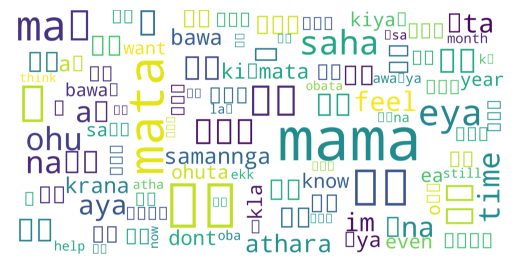

In [40]:
from wordcloud import WordCloud

word_cloud_text = ''.join(df['cleaned_text'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud,interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

# `Model Implementation`

---



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

`Logistic Regression Algorithm`

---



In [33]:
# Train the model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [34]:
from sklearn.metrics import classification_report

classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

